# Acquisizione, Pulizia e Verifica dei Dati

## Introduzione
In questa sezione, esploreremo come acquisire, pulire e verificare i dati finanziari utilizzando Python. Questi passaggi sono fondamentali per garantire che i dati siano pronti per l'analisi e lo sviluppo di strategie di trading algoritmico.

In [1]:
# Importazione delle librerie necessarie
import yfinance as yf
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt

## 1. Acquisizione dei Dati

### 1.1. Utilizzo di `yfinance`

`yfinance` è una libreria che permette di scaricare dati di mercato da Yahoo Finance. Supporta dati storici e in tempo reale per azioni, indici, valute e criptovalute. I dati disponibili includono:

- **Dati di prezzo**: Open, High, Low, Close (OHLC), Volume, Adjusted Close.
- **Dati fondamentali**: Informazioni aziendali, bilanci, utili per azione (EPS), dividendi, etc.
- **Dati di mercato**: Capitalizzazione di mercato, settore, beta, etc.

Ecco un esempio di acquisizione dei dati storici di Apple (AAPL).

In [2]:
# Scarichiamo i dati storici di Apple (AAPL) per l'anno 2022
ticker = "AAPL"
data = yf.download(ticker, start="2022-01-01", end="2023-01-01")

# Visualizziamo le prime 5 righe dei dati
data.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2022-01-03,178.879913,179.734962,174.653874,174.771805,104487900
2022-01-04,176.609650,179.793936,176.039622,179.489269,99310400
2022-01-05,171.911865,177.071580,171.636682,176.521213,94537600
2022-01-06,169.042038,172.285289,168.688228,169.729997,96904000
2022-01-07,169.209152,171.145275,168.088758,169.916771,86709100


### 1.2. Tipi di Dati Acquisibili con `yfinance.Ticker`

Oltre ai dati storici, `yfinance.Ticker` permette di accedere a informazioni dettagliate su un asset specifico. Ecco alcuni esempi:

In [3]:
# Creazione di un oggetto Ticker per Apple (AAPL)
ticker_info = yf.Ticker(ticker)

# Esempi di dati disponibili
print("Nome dell'azienda:", ticker_info.info['longName'])
print("Settore:", ticker_info.info['sector'])
print("Capitalizzazione di mercato:", ticker_info.info['marketCap'])
print("Utili per azione (EPS):", ticker_info.info['trailingEps'])
print("Dividendi:", ticker_info.dividends)

Nome dell'azienda: Apple Inc.
Settore: Technology
Capitalizzazione di mercato: 3207068385280
Utili per azione (EPS): 6.29
Dividendi: Date
1987-05-11 00:00:00-04:00    0.000536
1987-08-10 00:00:00-04:00    0.000536
1987-11-17 00:00:00-05:00    0.000714
1988-02-12 00:00:00-05:00    0.000714
1988-05-16 00:00:00-04:00    0.000714
                               ...   
2024-02-09 00:00:00-05:00    0.240000
2024-05-10 00:00:00-04:00    0.250000
2024-08-12 00:00:00-04:00    0.250000
2024-11-08 00:00:00-05:00    0.250000
2025-02-10 00:00:00-05:00    0.250000
Name: Dividends, Length: 86, dtype: float64


### 1.3. Utilizzo di `pandas_datareader`

`pandas_datareader` è un'altra libreria utile per acquisire dati finanziari da fonti pubbliche come Yahoo Finance, FRED (Federal Reserve Economic Data) e la Banca Mondiale. Ecco un esempio di acquisizione di dati macroeconomici.

In [4]:
# Esempio di acquisizione del PIL degli Stati Uniti da FRED
start_date = datetime.datetime(2022, 1, 1)
end_date = datetime.datetime(2023, 1, 1)
gdp_data = web.DataReader('GDP', 'fred', start_date, end_date)

print(gdp_data.head())

                  GDP
DATE                 
2022-01-01  25215.491
2022-04-01  25805.791
2022-07-01  26272.011
2022-10-01  26734.277
2023-01-01  27164.359


## 2. Pulizia dei Dati

### 2.1. Verifica dei Valori Mancanti

Prima di procedere, verifichiamo la presenza di valori mancanti nei dati.

In [5]:
# Verifica dei valori mancanti
print("Numero di valori mancanti per colonna:")
print(data.isnull().sum())

# Imputazione dei valori mancanti con la media (solo per colonne numeriche)
data_filled = data.fillna(data.mean())

Numero di valori mancanti per colonna:
Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64


### 2.2. Verifica dei Duplicati

Controlliamo la presenza di duplicati nei dati.

In [6]:
# Verifica dei duplicati
print("Numero di duplicati:", data_filled.duplicated().sum())

# Rimozione dei duplicati (se presenti)
data_filled = data_filled.drop_duplicates()

Numero di duplicati: 0


### 2.3. Gestione dei Dati Temporali

Assicuriamoci che i dati temporali siano correttamente formattati.

In [7]:
# Aggiunta di una colonna con il timestamp
data_filled['Date'] = data_filled.index

# Verifica dell'ultima data disponibile
print("Ultima data disponibile:", data_filled['Date'].max())

Ultima data disponibile: 2022-12-30 00:00:00


## 3. Verifica della Qualità dei Dati

### 3.1. Analisi delle Distribuzioni Statistiche

Verifichiamo le distribuzioni dei dati per individuare eventuali anomalie.

Price        Close        High         Low        Open        Volume  \
Ticker        AAPL        AAPL        AAPL        AAPL          AAPL   
count   251.000000  251.000000  251.000000  251.000000  2.510000e+02   
mean    152.607555  154.650546  150.494616  152.575786  8.791038e+07   
min     124.591370  128.456450  124.423325  126.518963  3.519590e+07   
25%     142.799400  144.964505  140.376146  142.454336  7.229740e+07   
50%     151.855804  153.570582  149.736973  151.776959  8.373720e+07   
75%     163.372063  165.754616  161.384465  163.704368  9.693705e+07   
max     178.879913  179.793936  176.039622  179.489269  1.826020e+08   
std      12.697923   12.575341   12.753980   12.705787  2.365699e+07   

Price                            Date  
Ticker                                 
count                             251  
mean    2022-07-02 15:23:39.920318720  
min               2022-01-03 00:00:00  
25%               2022-04-02 12:00:00  
50%               2022-07-05 00:00:00  

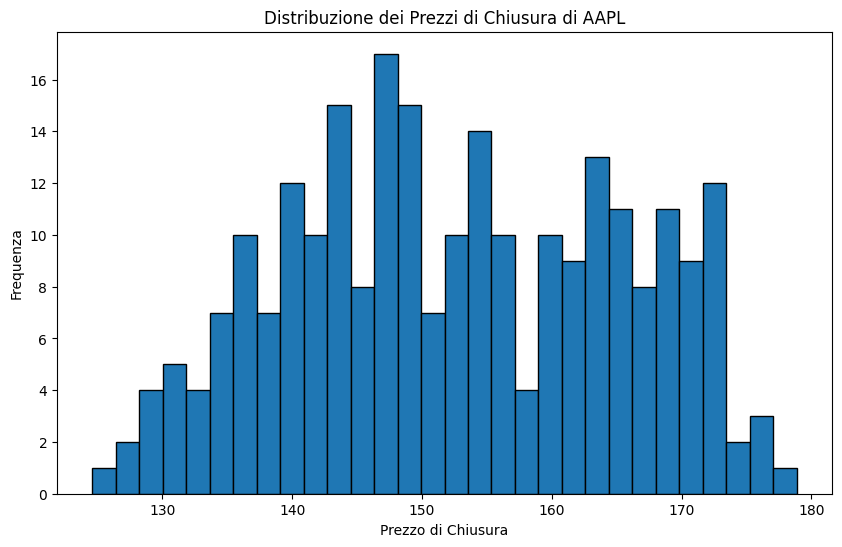

In [8]:
# Statistiche descrittive dei dati
print(data_filled.describe())

# Visualizzazione della distribuzione dei prezzi di chiusura
plt.figure(figsize=(10, 6))
plt.hist(data_filled['Close'], bins=30, edgecolor='black')
plt.title('Distribuzione dei Prezzi di Chiusura di AAPL')
plt.xlabel('Prezzo di Chiusura')
plt.ylabel('Frequenza')
plt.show()

### 3.2. Identificazione degli Outlier

Utilizziamo il metodo dell'intervallo interquartile (IQR) per identificare eventuali outlier.

In [9]:
# Calcolo dell'IQR per i prezzi di chiusura
Q1 = data_filled['Close'].quantile(0.25)
Q3 = data_filled['Close'].quantile(0.75)
IQR = Q3 - Q1

# Identificazione degli outlier
outliers = data_filled[(data_filled['Close'] < (Q1 - 1.5 * IQR)) | (data_filled['Close'] > (Q3 + 1.5 * IQR))]
print("Outlier nei prezzi di chiusura:")
print(outliers.dropna())

Outlier nei prezzi di chiusura:
Empty DataFrame
Columns: [(Close, AAPL), (High, AAPL), (Low, AAPL), (Open, AAPL), (Volume, AAPL), (Date, )]
Index: []


### 3.3. Verifica della Consistenza Temporale

Verifichiamo che i dati siano allineati temporalmente e non presentino lacune.

In [10]:
# Calcolo della differenza temporale tra osservazioni e
# Visualizzazione delle differenze temporali
print(data_filled['Date'].diff().value_counts())

Date
1 days    198
3 days     43
4 days      8
2 days      1
Name: count, dtype: int64


In [11]:
# Rimozione della colonna 'Ticker' (sono tutte le stesse)
data_filled.columns = data_filled.columns.droplevel(1)

# Salvataggio dei dati puliti in un file CSV
data_filled.to_csv('./datasets/cleaned_data.csv', index=False)

## Conclusione

In questo notebook, abbiamo acquisito dati finanziari utilizzando `yfinance` e `pandas_datareader`, descritto i tipi di dati disponibili e eseguito operazioni di pulizia e verifica. I dati sono ora pronti per essere utilizzati in analisi successive.